import pandas as pd
import re

# German dataset

In [21]:
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) epoch (\d+) Test -- ACC: (\S+) AUC_ROC:(\S+) F1:(\S+) DP:(\S+) EO:(\S+)'

# 读取日志文件
with open('german_FairVGNN.txt', 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    match = re.match(pattern, line.strip())
    if match:
        data.append(match.groups())    
columns = ['timestamp', 'epoch', 'ACC', 'AUC_ROC', 'F1', 'DP', 'EO']
german_fairvgnn_df = pd.DataFrame(data, columns=columns)
numeric_columns = ['epoch', 'ACC', 'AUC_ROC', 'F1', 'DP', 'EO']
german_fairvgnn_df[numeric_columns] = german_fairvgnn_df[numeric_columns].apply(pd.to_numeric) 

In [22]:
german_fairvgnn_df

,timestamp,epoch,ACC,AUC_ROC,F1,DP,EO
0,2025-01-24 15:03:39,0,0.320,0.6402,0.0659,0.0063,0.0021
1,2025-01-24 15:03:44,1,0.692,0.5650,0.8180,0.0213,0.0357
2,2025-01-24 15:03:49,2,0.328,0.6345,0.0870,0.0406,0.0410
3,2025-01-24 15:03:53,3,0.300,0.6672,0.0000,0.0000,0.0000
4,2025-01-24 15:03:57,4,0.700,0.4550,0.8235,0.0000,0.0000
...,...,...,...,...,...,...,...
195,2025-01-24 15:18:29,195,0.352,0.6670,0.1562,0.0615,0.1103
196,2025-01-24 15:18:33,196,0.552,0.6782,0.5852,0.3362,0.3225
197,2025-01-24 15:18:38,197,0.488,0.6330,0.4921,0.1356,0.1271
198,2025-01-24 15:18:42,198,0.472,0.6256,0.4590,0.1184,0.0767


In [23]:
with open('german_SFG.txt', 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    match = re.match(pattern, line.strip())
    if match:
        data.append(match.groups())    
columns = ['timestamp', 'epoch', 'ACC', 'AUC_ROC', 'F1', 'DP', 'EO']
german_sfg_df = pd.DataFrame(data, columns=columns)
numeric_columns = ['epoch', 'ACC', 'AUC_ROC', 'F1', 'DP', 'EO']
german_sfg_df[numeric_columns] = german_sfg_df[numeric_columns].apply(pd.to_numeric) 

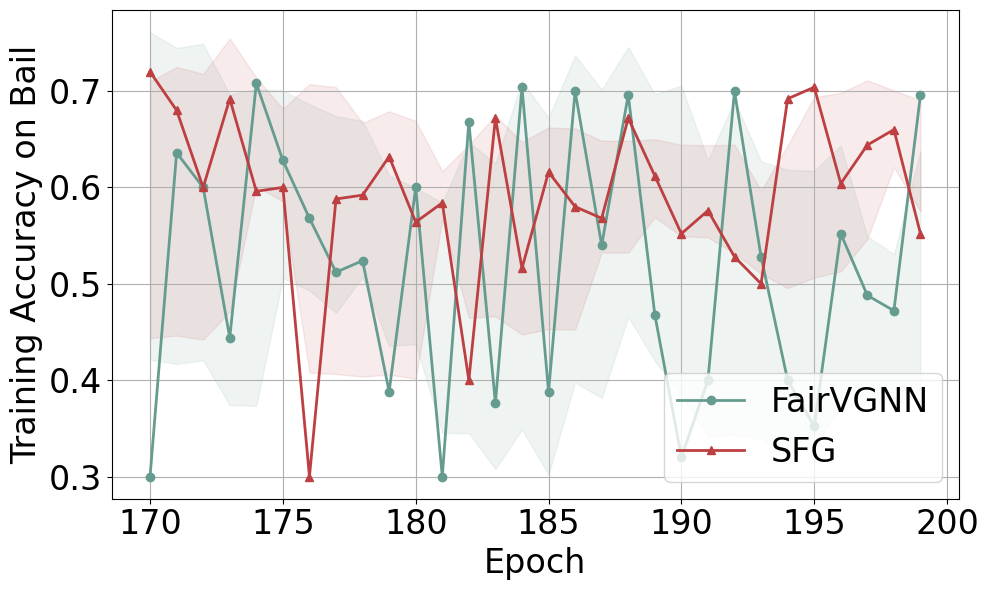

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(german_fairvgnn_df['epoch'][-30:], german_fairvgnn_df['ACC'][-30:], lw=2, c='#669C8F', marker='o', label='FairVGNN')
rolling_mean_fairvgnn = german_fairvgnn_df['ACC'][-34:].rolling(window=5).mean()
rolling_std_fairvgnn = german_fairvgnn_df['ACC'][-34:].rolling(window=5).std()
# plt.plot(g_10_df['epoch'][-30:], rolling_mean_fairvgnn, linestyle='--', lw=3, c='#669C8F', marker='o')
plt.fill_between(german_fairvgnn_df['epoch'][-30:], rolling_mean_fairvgnn[-30:] - rolling_std_fairvgnn[-30:], rolling_mean_fairvgnn[-30:] + rolling_std_fairvgnn[-30:],
                 color='#669C8F', alpha=0.1)

plt.plot(german_sfg_df['epoch'][-30:], german_sfg_df['ACC'][-30:], lw=2, c='#BD3F41', marker='^', label='SFG')
rolling_mean_sfg = german_sfg_df['ACC'][-34:].rolling(window=5).mean()
rolling_std_sfg = german_sfg_df['ACC'][-34:].rolling(window=5).std()
# plt.plot(ct_10_df['epoch'][-30:], rolling_mean_sfg, linestyle='--', lw=3, c='#BD3F41', marker='^')
plt.fill_between(german_sfg_df['epoch'][-30:], rolling_mean_sfg[-30:] - rolling_std_sfg[-30:], rolling_mean_sfg[-30:] + rolling_std_sfg[-30:],
                 color='#BD3F41', alpha=0.1)

plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Training Accuracy on Bail', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)  
plt.legend(loc='lower right', fontsize=24)
plt.grid(True)
plt.tight_layout()
# plt.savefig('fig2-a.pdf')
plt.show()

# Credit

In [11]:
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) epoch (\d+) Test -- ACC: (\S+) AUC_ROC:(\S+) F1:(\S+) DP:(\S+) EO:(\S+)'

# 读取日志文件
with open('credit_FairVGNN.txt', 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    match = re.match(pattern, line.strip())
    if match:
        data.append(match.groups())    
columns = ['timestamp', 'epoch', 'ACC', 'AUC_ROC', 'F1', 'DP', 'EO']
credit_fairvgnn_df = pd.DataFrame(data, columns=columns)
numeric_columns = ['epoch', 'ACC', 'AUC_ROC', 'F1', 'DP', 'EO']
credit_fairvgnn_df[numeric_columns] = credit_fairvgnn_df[numeric_columns].apply(pd.to_numeric) 

In [13]:
with open('credit_SFG.txt', 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    match = re.match(pattern, line.strip())
    if match:
        data.append(match.groups())    
columns = ['timestamp', 'epoch', 'ACC', 'AUC_ROC', 'F1', 'DP', 'EO']
credit_sfg_df = pd.DataFrame(data, columns=columns)
numeric_columns = ['epoch', 'ACC', 'AUC_ROC', 'F1', 'DP', 'EO']
credit_sfg_df[numeric_columns] = credit_sfg_df[numeric_columns].apply(pd.to_numeric) 

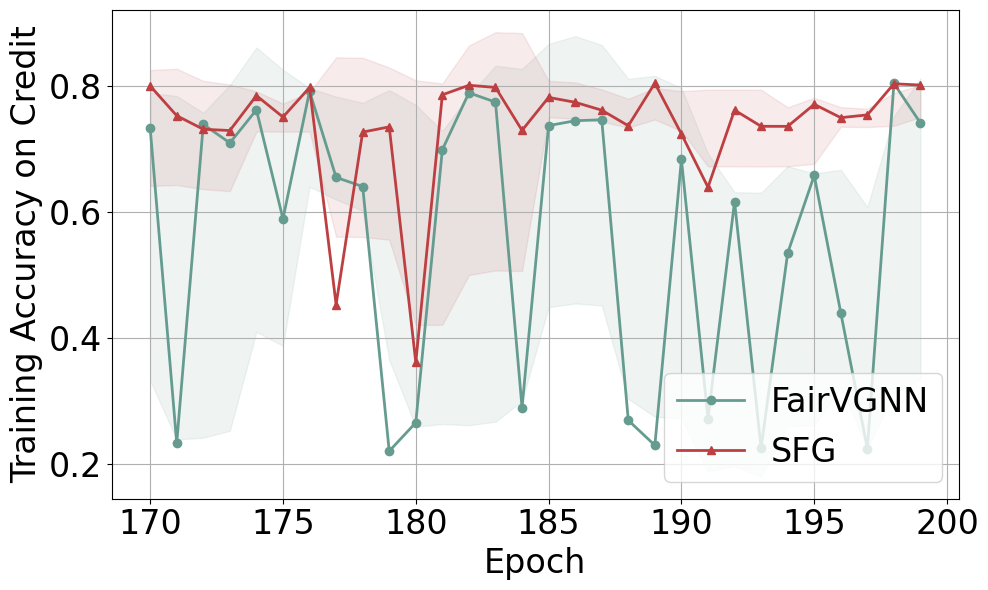

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(credit_fairvgnn_df['epoch'][-30:], credit_fairvgnn_df['ACC'][-30:], lw=2, c='#669C8F', marker='o', label='FairVGNN')
rolling_mean_fairvgnn = credit_fairvgnn_df['ACC'][-34:].rolling(window=5).mean()
rolling_std_fairvgnn = credit_fairvgnn_df['ACC'][-34:].rolling(window=5).std()
# plt.plot(g_10_df['epoch'][-30:], rolling_mean_fairvgnn, linestyle='--', lw=3, c='#669C8F', marker='o')
plt.fill_between(credit_fairvgnn_df['epoch'][-30:], rolling_mean_fairvgnn[-30:] - rolling_std_fairvgnn[-30:], rolling_mean_fairvgnn[-30:] + rolling_std_fairvgnn[-30:],
                 color='#669C8F', alpha=0.1)

plt.plot(credit_sfg_df['epoch'][-30:], credit_sfg_df['ACC'][-30:], lw=2, c='#BD3F41', marker='^', label='SFG')
rolling_mean_sfg = credit_sfg_df['ACC'][-34:].rolling(window=5).mean()
rolling_std_sfg = credit_sfg_df['ACC'][-34:].rolling(window=5).std()
# plt.plot(ct_10_df['epoch'][-30:], rolling_mean_sfg, linestyle='--', lw=3, c='#BD3F41', marker='^')
plt.fill_between(credit_sfg_df['epoch'][-30:], rolling_mean_sfg[-30:] - rolling_std_sfg[-30:], rolling_mean_sfg[-30:] + rolling_std_sfg[-30:],
                 color='#BD3F41', alpha=0.1)

plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Training Accuracy on Credit', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)  
plt.legend(loc='lower right', fontsize=24)
plt.grid(True)
plt.tight_layout()
# plt.savefig('fig2-c.pdf')
plt.show()